In [30]:
!pip install wordcloud

In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
nltk.download('all')
plt.style.use('ggplot')
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\phath\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\phath\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\phath\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\phath\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\phath\AppData\Roaming\nltk_data...
[

In [32]:
df = pd.read_csv("data/threads_reviews.csv")
df.head(10)

,source,review_description,rating,review_date
0,Google Play,Very good app for Android phone and me,5,27-08-2023 10:31
1,Google Play,Sl👍👍👍👍,5,27-08-2023 10:28
2,Google Play,Best app,5,27-08-2023 9:47
3,Google Play,Gatiya app,1,27-08-2023 9:13
4,Google Play,Lit bruv,5,27-08-2023 9:00
5,Google Play,Good,5,27-08-2023 8:48
6,Google Play,Don't install for privacy concern It's track y...,1,27-08-2023 8:47
7,Google Play,Like probably,5,27-08-2023 8:43
8,Google Play,لا استطيع نشر شيء، ولا حتى مشاهدة محتوى الصفحا...,1,27-08-2023 8:39
9,Google Play,🕺🕺❕❕🕺🏽,5,27-08-2023 8:19


In [33]:
print(f"shape: {df.shape}")
print(f"columns: {df.columns}")
print(f"missing values: {df.isnull().sum()}")
print(f"info: {df.info()}")
print(f"description: {df.describe()}")

shape: (40435, 4)
columns: Index(['source', 'review_description', 'rating', 'review_date'], dtype='object')
missing values: source                0
review_description    0
rating                0
review_date           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40435 entries, 0 to 40434
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              40435 non-null  object
 1   review_description  40435 non-null  object
 2   rating              40435 non-null  int64 
 3   review_date         40435 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB
info: None
description:              rating
count  40435.000000
mean       3.300532
std        1.773157
min        1.000000
25%        1.000000
50%        4.000000
75%        5.000000
max        5.000000


In [34]:
for col in df.columns:
    missing_data = df[col].isna().sum()
    missing_per = missing_data /len(df)*100
    print(f"Column {col} has {missing_per}% missing data")

Column source has 0.0% missing data
Column review_description has 0.0% missing data
Column rating has 0.0% missing data
Column review_date has 0.0% missing data


In [35]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtype'])
    summary_df['missing'] = df.isnull().sum()
    summary_df['missing_per'] = df.isnull().sum() / len(df) * 100
    summary_df['uniques'] = df.nunique().values
    summary_df['count'] = df.count().values
    return summary_df

summary(df).style.background_gradient(cmap='Blues')

,dtype,missing,missing_per,uniques,count
source,object,0,0.000000,2,40435
review_description,object,0,0.000000,32894,40435
rating,int64,0,0.000000,5,40435
review_date,object,0,0.000000,16742,40435


In [36]:
df.drop_duplicates(inplace=True)

### EDA

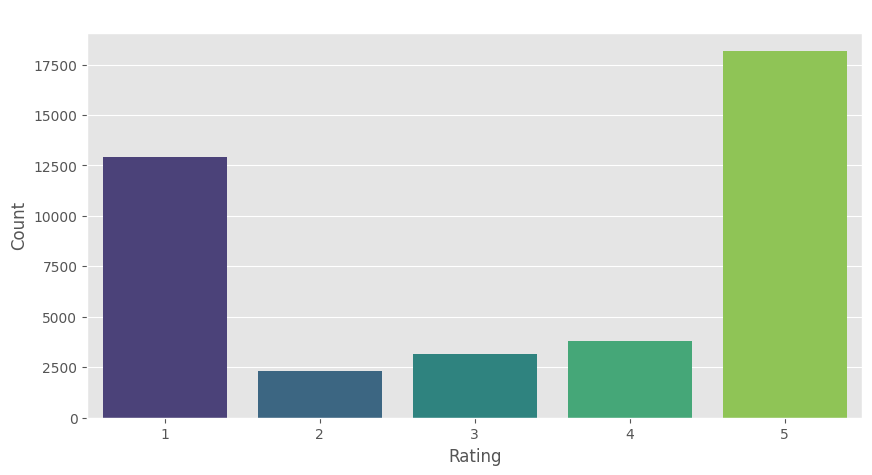

In [37]:
plt.figure(figsize=(10, 5))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title("<b>Distribute of rating<b>")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

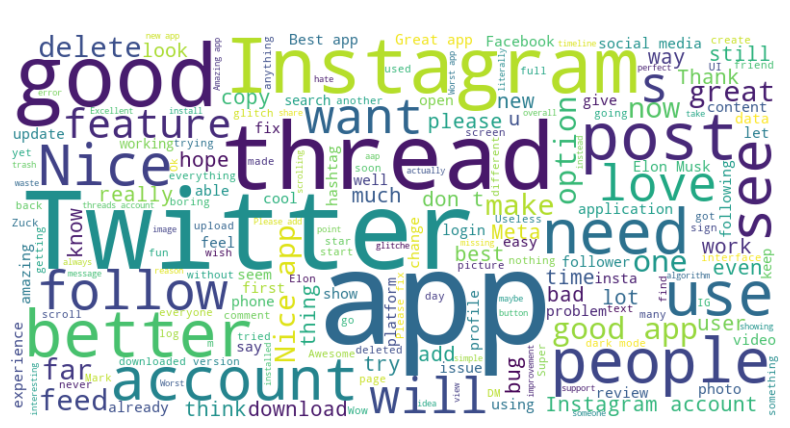

In [38]:
text = " ".join(df["review_description"])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("<b>Word Cloud of Reviews<b>")
plt.show()

In [39]:
best_review=df["review_description"][2]
print(best_review)

Best app


In [40]:
elon = df["review_description"][10]
print(elon)

Elon from marse


In [41]:
tokens = nltk.word_tokenize(elon)
print(tokens)

['Elon', 'from', 'marse']


In [42]:
elon_tags = nltk.pos_tag(tokens)
print(elon_tags)

[('Elon', 'NN'), ('from', 'IN'), ('marse', 'NN')]


In [43]:
elon_chunk = nltk.ne_chunk(elon_tags)
print(elon_chunk)

(S (GPE Elon/NN) from/IN marse/NN)


### VADER Sentiment Scoring

In [44]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

sia = SentimentIntensityAnalyzer()

In [45]:
sia.polarity_scores(best_review)

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}

In [46]:
sia.polarity_scores(elon)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [47]:
res = {}
for _,row in tqdm(df.iterrows(), total = len(df)):
    text = row["review_description"]
    myID = row["review_date"]
    res[myID] = sia.polarity_scores(text)

100%|██████████| 40340/40340 [00:05<00:00, 6948.28it/s]


In [48]:
varders = pd.DataFrame(res).T; varders
varders.reset_index().rename(columns={"index":"review_date"})
varders = varders.merge(df, left_index=True, right_on="review_date")
varders

,neg,neu,pos,compound,source,review_description,rating,review_date
0,0.000,0.687,0.313,0.4927,Google Play,Very good app for Android phone and me,5,27-08-2023 10:31
1,0.000,1.000,0.000,0.0000,Google Play,Sl👍👍👍👍,5,27-08-2023 10:28
2,0.000,0.192,0.808,0.6369,Google Play,Best app,5,27-08-2023 9:47
3,0.000,1.000,0.000,0.0000,Google Play,Gatiya app,1,27-08-2023 9:13
4,0.000,1.000,0.000,0.0000,Google Play,Lit bruv,5,27-08-2023 9:00
...,...,...,...,...,...,...,...,...
40416,0.000,0.793,0.207,0.7003,App Store,They don’t let you delete your account once yo...,1,27-08-2023 4:21
40417,0.000,1.000,0.000,0.0000,App Store,Twitter >>>> Threads,1,27-08-2023 1:23
40418,0.045,0.737,0.218,0.7314,App Store,"Really? Hard to believe. I’m not in Calif., bu...",1,26-08-2023 20:51
40419,0.058,0.759,0.183,0.9382,App Store,"While the app seems like a good start, it seem...",2,26-08-2023 19:49


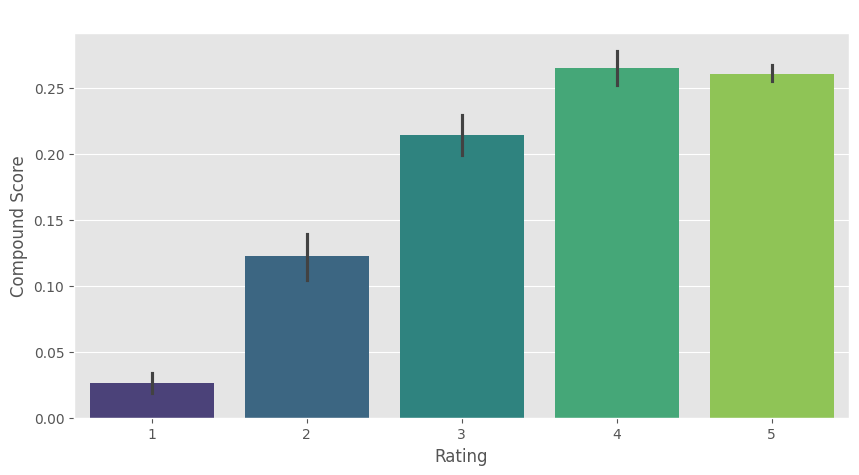

In [49]:
# plotting Vader results

plt.figure(figsize=(10, 5))
sns.barplot(x="rating", y="compound", data=varders, palette='viridis')
plt.title("<b>Vader Compound Score by Rating<b>")
plt.xlabel("Rating")
plt.ylabel("Compound Score")
plt.show()

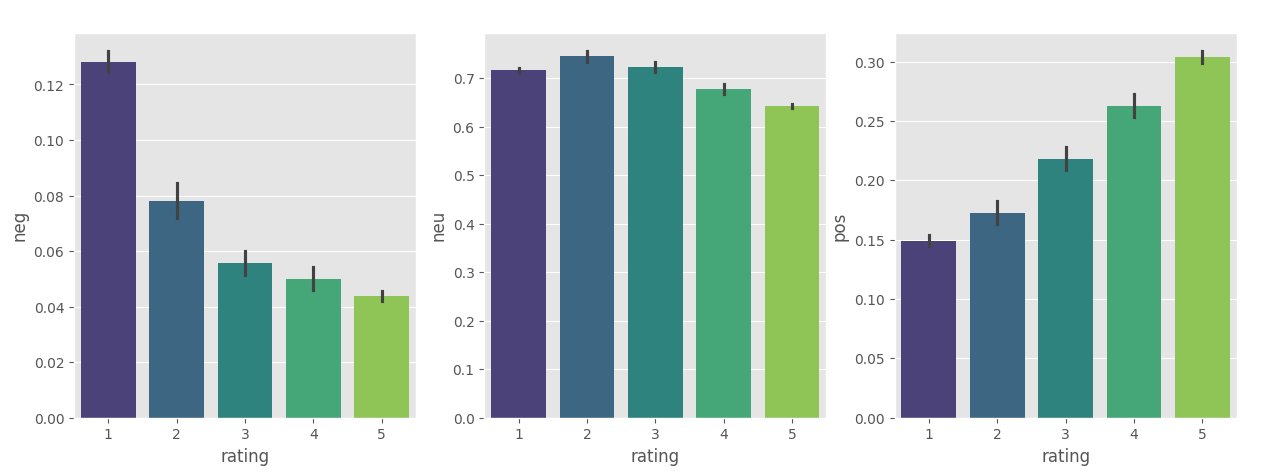

In [50]:
fig, ax =plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
sns.barplot(data=varders, x="rating", y="neg", palette='viridis', ax=ax[0])
sns.barplot(data=varders, x="rating", y="neu", palette='viridis', ax=ax[1])
sns.barplot(data=varders, x="rating", y="pos", palette='viridis', ax=ax[2])
ax[0].set_title("<b>Vader Negative Score by Rating<b>")
ax[1].set_title("<b>Vader Neutral Score by Rating<b>")
ax[2].set_title("<b>Vader Positive Score by Rating<b>")
plt.show()

In [51]:
!pip install transformers
!pip install tensorflow
!pip install torch

In [52]:
## import pretrain twitter model about setiment analysis

from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [57]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import tensorflow as tf

MODEL = "cardiffnlp/twitter-roberta-base-sentiment"

# Tải tokenizer và model
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


In [60]:
encoded_text = tokenizer(elon, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
print(scores_dict)

IndexError: invalid index to scalar variable.

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [63]:
X = df["review_description"]
y = df["rating"]


In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=df["rating"])


In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
X_train_vec = tfid.fit_transform(X_train)
X_test_vec = tfid.transform(X_test)


In [68]:
lr = LogisticRegression()
lr.fit(X_train_vec, y_train)
preds = lr.predict(X_test_vec)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.71      0.79      0.75      2583
           2       0.24      0.04      0.07       459
           3       0.32      0.14      0.19       635
           4       0.31      0.11      0.16       757
           5       0.73      0.91      0.81      3634

    accuracy                           0.69      8068
   macro avg       0.46      0.40      0.40      8068
weighted avg       0.62      0.69      0.64      8068

